In [431]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

In [432]:
stock =["SPY","SPLG","VTI","QQQM","SPGI","AAPL","TSLA","AMZN","GOOGL","NVDA","PYPL","COST","META","MCO","LULU","V","PLTR","CVX"]
stocks = yf.download(stock, start="2000-01-01", end ="2025-02-03")
data = stocks.loc[:,"Close"].copy()

stocks

[*********************100%***********************]  18 of 18 completed


Price        Adj Close                                                  \
Ticker            AAPL        AMZN        COST         CVX       GOOGL   
Date                                                                     
2000-01-03    0.843077    4.468750   29.884636   16.611208         NaN   
2000-01-04    0.771997    4.096875   28.247686   16.611208         NaN   
2000-01-05    0.783293    3.487500   28.730375   16.909164         NaN   
2000-01-06    0.715508    3.278125   29.307508   17.629236         NaN   
2000-01-07    0.749401    3.478125   31.248753   17.939608         NaN   
...                ...         ...         ...         ...         ...   
2025-01-27  229.860001  235.419998  965.250000  157.229996  191.809998   
2025-01-28  238.259995  238.149994  958.669983  156.210007  195.300003   
2025-01-29  239.360001  237.070007  964.020020  155.690002  195.410004   
2025-01-30  237.589996  234.639999  979.010010  156.320007  200.869995   
2025-01-31  236.000000  237.679993  979.880005  149.190002  204.020004   

Price                                                                  ...  \
Ticker            LULU         MCO        META        NVDA       PLTR  ...   
Date                                                                   ...   
2000-01-03         NaN    8.477684         NaN    0.089440        NaN  ...   
2000-01-04         NaN    8.232665         NaN    0.087052        NaN  ...   
2000-01-05         NaN    8.085655         NaN    0.084186        NaN  ...   
2000-01-06         NaN    8.085655         NaN    0.078692        NaN  ...   
2000-01-07         NaN    8.281667         NaN    0.080007        NaN  ...   
...                ...         ...         ...         ...        ...  ...   
2025-01-27  402.899994  496.089996  659.880005  118.419998  75.440002  ...   
2025-01-28  409.420013  493.000000  674.330017  128.990005  80.230003  ...   
2025-01-29  411.160004  490.320007  676.489990  123.699997  79.760002  ...   
2025-01-30  421.160004  499.200012  687.000000  124.650002  81.220001  ...   
2025-01-31  414.200012  499.440002  689.179993  120.070000  82.489998  ...   

Price          Volume                                                        \
Ticker           NVDA        PLTR       PYPL       QQQM     SPGI       SPLG   
Date                                                                          
2000-01-03  300912000         NaN        NaN        NaN   778600        NaN   
2000-01-04  300480000         NaN        NaN        NaN  1267800        NaN   
2000-01-05  188352000         NaN        NaN        NaN  2723000        NaN   
2000-01-06  120480000         NaN        NaN        NaN  1864000        NaN   
2000-01-07   71184000         NaN        NaN        NaN  3660000        NaN   
...               ...         ...        ...        ...      ...        ...   
2025-01-27  818830900  76093300.0  6923800.0  5208400.0   994700  9045400.0   
2025-01-28  579666400  65916700.0  8666000.0  2485700.0  1010300  4712400.0   
2025-01-29  467120600  49262200.0  5234500.0  2332200.0   947500  4662500.0   
2025-01-30  392925500  46067500.0  7708500.0  2123100.0   771400  6473500.0   
2025-01-31  390372900  79000200.0  8338900.0  3522400.0  1256800  7295300.0   

Price                                                   
Ticker           SPY        TSLA          V        VTI  
Date                                                    
2000-01-03   8164300         NaN        NaN        NaN  
2000-01-04   8089800         NaN        NaN        NaN  
2000-01-05  12177900         NaN        NaN        NaN  
2000-01-06   6227200         NaN        NaN        NaN  
2000-01-07   8066500         NaN        NaN        NaN  
...              ...         ...        ...        ...  
2025-01-27  70361100  58125500.0  6636500.0  5321300.0  
2025-01-28  44433300  48910700.0  5999600.0  2717300.0  
2025-01-29  37177400  68033600.0  5087300.0  2620200.0  
2025-01-30  39281300  98092900.0  8081300.0  2891200.0  
2025-01-31  66671500  

In [433]:
stocks = stocks.drop(["Volume","Open","Low","High","Close"], axis=1,)
# Calculate daily returns as percentage change
daily_return = stocks.pct_change()  # return as decimals (not percentage)

# Add a "Year" column to group by year
daily_return['Year'] = daily_return.index.year

# Calculate annual returns
annual_returns = daily_return.groupby('Year').apply(
    lambda x: (1 + x).prod() ** (252 / len(x)) - 1
)
annual_returns = annual_returns.replace(0, np.nan)
annual_returns = annual_returns.drop(["Year"], axis=1,)
annual_returns


/var/folders/7p/nnq37v5n39s2jtsql5bdy6br0000gn/T/ipykernel_79728/763553381.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_returns = daily_return.groupby('Year').apply(


Price  Adj Close                                                              \
Ticker      AAPL      AMZN      COST       CVX     GOOGL      LULU       MCO   
Year                                                                           
2000   -0.734227 -0.825874 -0.102528  0.041509       NaN       NaN  0.189956   
2001    0.481481 -0.308803  0.113128  0.094366       NaN       NaN  0.571742   
2002   -0.345661  0.745841 -0.367733 -0.230911       NaN       NaN  0.040080   
2003    0.491275  1.785601  0.325018  0.353668       NaN       NaN  0.471739   
2004    2.013572 -0.158305  0.311427  0.255410  0.921368       NaN  0.440616   
2005    1.232609  0.064574  0.031933  0.115426  1.151875       NaN  0.418967   
2006    0.180916 -0.163690  0.079413  0.338573  0.110426       NaN  0.129990   
2007    1.342648  1.355690  0.333736  0.306887  0.504085  0.695333 -0.481270   
2008   -0.567677 -0.445164 -0.239060 -0.182639 -0.553658 -0.831408 -0.428821   
2009    1.469011  1.623245  0.143197  0.080610  1.015212  2.795713  0.356028   
2010    0.530678  0.338091  0.236788  0.229461 -0.041953  1.273090  0.007632   
2011    0.255581 -0.038333  0.167428  0.202801  0.087429  0.363929  0.289412   
2012    0.328662  0.453587  0.286533  0.051030  0.095982  0.640162  0.523300   
2013    0.080695  0.589628  0.218338  0.193086  0.584311 -0.225633  0.582190   
2014    0.406225 -0.221771  0.204604 -0.069889 -0.053940 -0.054887  0.236760   
2015   -0.030137  1.177831  0.189449 -0.161706  0.466118 -0.059509  0.060978   
2016    0.124804  0.109456  0.002778  0.366614  0.018560  0.238612 -0.045626   
2017    0.486983  0.562327  0.224705  0.106340  0.330804  0.210179  0.588222   
2018   -0.054111  0.285598  0.106437 -0.097843 -0.008044  0.550092 -0.041192   
2019    0.889578  0.230277  0.457007  0.152736  0.281762  0.905024  0.712600   
2020    0.818745  0.758617  0.325182 -0.258641  0.307146  0.499852  0.231609   
2021    0.346482  0.023768  0.518212  0.462413  0.652958  0.124759  0.355745   
2022   -0.264940 -0.497526 -0.191180  0.587533 -0.392097 -0.182209 -0.280945   
2023    0.494842  0.817406  0.494800 -0.137339  0.589079  0.601865  0.419160   
2024    0.307052  0.443925  0.396227  0.012871  0.360056 -0.252068  0.221692   
2025   -0.526345  1.742680  1.329607  0.451862  1.569087  1.735136  0.964992   

Price                                                                         \
Ticker      META      NVDA      PLTR      PYPL      QQQM      SPGI      SPLG   
Year                                                                           
2000         NaN  0.399862       NaN       NaN       NaN  0.021113       NaN   
2001         NaN  3.177291       NaN       NaN       NaN  0.057902       NaN   
2002         NaN -0.827952       NaN       NaN       NaN  0.007262       NaN   
2003         NaN  1.015628       NaN       NaN       NaN  0.177618       NaN   
2004         NaN  0.015517       NaN       NaN       NaN  0.329339       NaN   
2005         NaN  0.551786       NaN       NaN       NaN  0.141685  0.020748   
2006         NaN  1.030312       NaN       NaN       NaN  0.336131  0.146095   
2007         NaN  0.380583       NaN       NaN       NaN -0.347672  0.057695   
2008         NaN -0.761434       NaN       NaN       NaN -0.454367 -0.367815   
2009         NaN  1.314746       NaN       NaN       NaN  0.493412  0.272300   
2010         NaN -0.175589       NaN       NaN       NaN  0.119798  0.158878   
2011         NaN -0.100000       NaN       NaN       NaN  0.265859  0.017145   
2012   -0.305702 -0.110561       NaN       NaN       NaN  0.303917  0.152742   
2013    1.052968  0.335238       NaN       NaN       NaN  0.459008  0.331724   
2014    0.427630  0.273957       NaN       NaN       NaN  0.154598  0.136870   
2015    0.341451  0.671156       NaN -0.013893       NaN  0.122487  0.011450   
2016    0.099274  2.269601       NaN  0.090332       NaN  0.105500  0.118210   
2017    0.536384  0.824226       NaN  0.869852       NaN  0.596129  0.213946   

Price            Adj Close                                                    \
Ticker                AAPL      AMZN      COST       CVX     GOOGL      LULU   
Price     Ticker                                                               
Adj Close AAPL    1.000000  0.214780  0.160615  0.083198  0.417075  0.520165   
          AMZN    0.214780  1.000000  0.515621 -0.008435  0.635996  0.674941   
          COST    0.160615  0.515621  1.000000  0.298290  0.680994  0.445341   
          CVX     0.083198 -0.008435  0.298290  1.000000  0.172208  0.164804   
          GOOGL   0.417075  0.635996  0.680994  0.172208  1.000000  0.621498   
          LULU    0.520165  0.674941  0.445341  0.164804  0.621498  1.000000   
          MCO     0.164991  0.247418  0.618004  0.111170  0.644358  0.378227   
          META   -0.412643  0.744460  0.899561  0.218019  0.881652  0.711760   
          NVDA    0.291295  0.029230  0.097687 -0.020675  0.159176  0.059425   
          PLTR    0.168740  0.625516  0.

Text(0.5, 1.0, 'Correlation Matrix of Annual Returns')

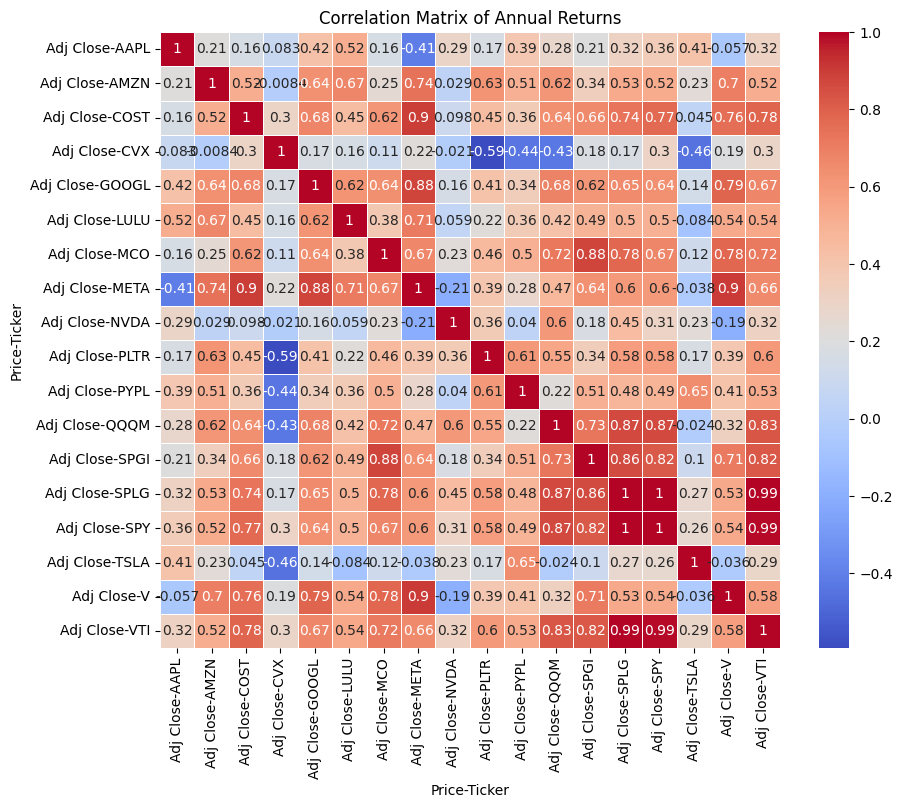

In [434]:
"Correlation for stock return each day"
correlation_matrix = annual_returns.corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Annual Returns')

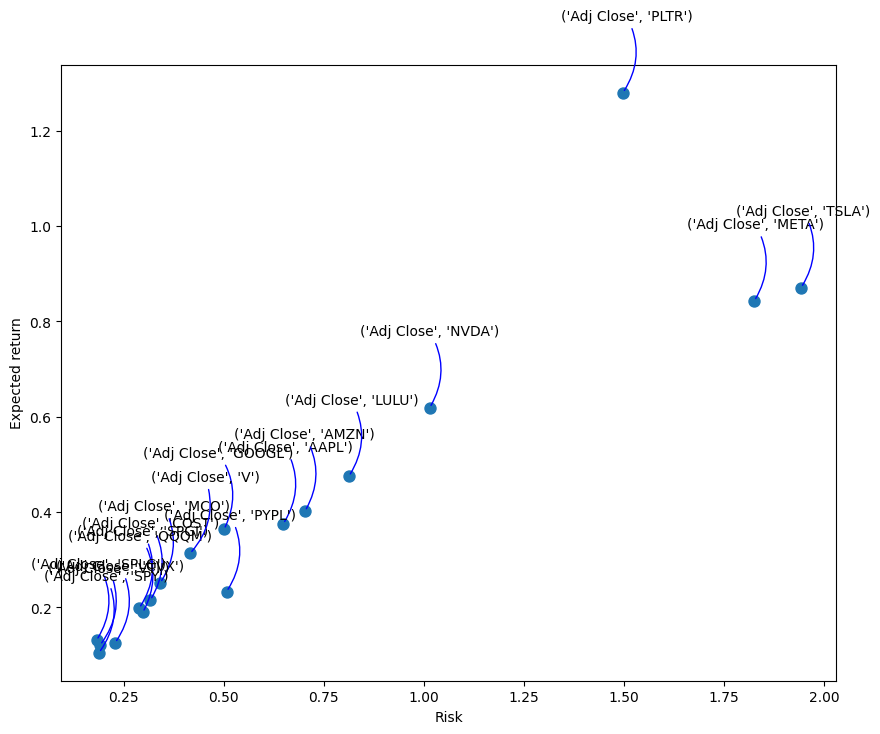

In [435]:
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(annual_returns.std(), annual_returns.mean(), s=area)
plt.xlabel('Risk')
plt.ylabel('Expected return')

for label, x, y in zip(annual_returns.columns, annual_returns.std(), annual_returns.mean()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [436]:
# Function to calculate portfolio statistics
def portfolio_stats(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Function to calculate the Sharpe Ratio
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_return, p_volatility = portfolio_stats(weights, mean_returns, cov_matrix)
    return (p_return - risk_free_rate) / p_volatility

def optimize_risky_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    # Set bounds for weights: each stock can't exceed 20% of the portfolio
    bounds = tuple((0, 0.1) for asset in range(num_assets))  # Cap at 20%

    result = minimize(
        lambda weights: -sharpe_ratio(weights, *args),  # Maximize Sharpe ratio
        num_assets * [1.0 / num_assets],  # Initial guess
        bounds=bounds,
        constraints=constraints
    )
    return result.x  # Optimal weights

# Calculate the weights between optimal risky portfolio and risk-free asset
def calculate_final_weights(optimal_weights, mean_returns, cov_matrix, risk_free_rate, target_volatility):
    # Portfolio return and volatility for the optimal risky portfolio
    optimal_return, optimal_volatility = portfolio_stats(optimal_weights, mean_returns, cov_matrix)
    
    # Weight of the portfolio based on desired volatility
    y = target_volatility / optimal_volatility
    
    # Calculate the final weights
    final_weights = y * optimal_weights

    # Final portfolio return and volatility
    final_return = y * optimal_return + (1 - y) * risk_free_rate
    final_volatility = target_volatility

    return final_weights, y, final_return, final_volatility

def main():
    expected_returns = annual_returns.mean()  # Average daily returns
    cov_matrix = annual_returns.cov()         # Covariance matrix of returns
    risk_free_rate = 0.00  # Risk-free rate
    target_volatility = 0.17  # Desired portfolio volatility

    # Find optimal risky portfolio weights
    optimal_weights = optimize_risky_portfolio(expected_returns, cov_matrix, risk_free_rate)
    
    # Calculate the final weights based on desired risk
    final_weights, leverage, final_return, final_volatility = calculate_final_weights(
        optimal_weights, expected_returns, cov_matrix, risk_free_rate, target_volatility
    )
    
    # Optimal risky portfolio stats
    optimal_return, optimal_volatility = portfolio_stats(optimal_weights, expected_returns, cov_matrix)

    print("Optimal Risky Portfolio Weights:", optimal_weights)
    print("Optimal Risky Portfolio Return:", optimal_return)
    print("Optimal Risky Portfolio Volatility:", optimal_volatility)
    print("Final Weights (including risk-free asset):", final_weights)
    print("Leverage (or proportion in risky portfolio):", leverage)
    print("Final Portfolio Return:", final_return)
    print("Final Portfolio Volatility:", final_volatility)

    # Assign names 
    named_optimal_weights = {name: weight for name, weight in zip(stocks, optimal_weights)}
    print("Final Risky Portfolio Weights:", named_optimal_weights)
    named_final_weights = {name: weight for name, weight in zip(stocks, final_weights)}
    print("Final Portfolio Weights:", named_final_weights)

if __name__ == "__main__":
    main()



Optimal Risky Portfolio Weights: [1.00000000e-01 1.26572014e-15 1.00000000e-01 1.00000000e-01
 4.10030568e-15 1.00000000e-01 1.00000000e-01 4.90516986e-16
 1.00000000e-01 1.00000000e-01 1.57992017e-15 1.21806622e-15
 1.00000000e-01 5.11286091e-02 9.03757081e-16 4.88713909e-02
 1.00000000e-01 1.09298916e-15]
Optimal Risky Portfolio Return: 0.4345484640522727
Optimal Risky Portfolio Volatility: 0.38813053621019594
Final Weights (including risk-free asset): [4.37996973e-02 5.54381591e-16 4.37996973e-02 4.37996973e-02
 1.79592148e-15 4.37996973e-02 4.37996973e-02 2.14844955e-16
 4.37996973e-02 4.37996973e-02 6.92000254e-16 5.33509317e-16
 4.37996973e-02 2.23941760e-02 3.95842866e-16 2.14055213e-02
 4.37996973e-02 4.78725945e-16]
Leverage (or proportion in risky portfolio): 0.43799697302851437
Final Portfolio Return: 0.19033091188908563
Final Portfolio Volatility: 0.17
Final Risky Portfolio Weights: {('Adj Close', 'AAPL'): 0.09999999999999958, ('Adj Close', 'AMZN'): 1.2657201415007372e-15, 

In [437]:
# Function to calculate portfolio statistics
def portfolio_stats(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Function to calculate the Sharpe Ratio
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_return, p_volatility = portfolio_stats(weights, mean_returns, cov_matrix)
    return (p_return - risk_free_rate) / p_volatility

# Find the optimal risky portfolio weights using numerical optimization
from scipy.optimize import minimize

def optimize_risky_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    # Set bounds for weights: each stock can't exceed 20% of the portfolio
    bounds = tuple((0, 0.8) for asset in range(num_assets))  # Cap at 20%

    result = minimize(
        lambda weights: -sharpe_ratio(weights, *args),  # Maximize Sharpe ratio
        num_assets * [1.0 / num_assets],  # Initial guess
        bounds=bounds,
        constraints=constraints
    )
    return result.x  # Optimal weights

# Calculate the weights based on a target return
def calculate_final_weights_by_return(optimal_weights, mean_returns, cov_matrix, risk_free_rate, target_return):
    # Portfolio return and volatility for the optimal risky portfolio
    optimal_return, optimal_volatility = portfolio_stats(optimal_weights, mean_returns, cov_matrix)
    
    # Weight of the portfolio based on the desired target return
    if target_return < risk_free_rate:
        raise ValueError("Target return must be greater than the risk-free rate.")
    y = (target_return - risk_free_rate) / (optimal_return - risk_free_rate)
    
    # Calculate the final weights
    final_weights = y * optimal_weights

    # Final portfolio return and volatility
    final_return = y * optimal_return + (1 - y) * risk_free_rate
    final_volatility = y * optimal_volatility

    return final_weights, y, final_return, final_volatility

# Main function to run the portfolio optimization
def main():
    # Example inputs
    expected_returns = annual_returns.mean()  # Average daily returns
    cov_matrix = annual_returns.cov()         # Covariance matrix of returns
    risk_free_rate = 0.05  # Risk-free rate
    target_return = 0.1  # Desired portfolio return (annualized)

    # Find optimal risky portfolio weights
    optimal_weights = optimize_risky_portfolio(expected_returns, cov_matrix, risk_free_rate)
    
    # Calculate the final weights based on the target return
    final_weights, leverage, final_return, final_volatility = calculate_final_weights_by_return(
        optimal_weights, expected_returns, cov_matrix, risk_free_rate, target_return
    )
    
    # Optimal risky portfolio stats
    optimal_return, optimal_volatility = portfolio_stats(optimal_weights, expected_returns, cov_matrix)

    print("Optimal Risky Portfolio Weights:", optimal_weights)
    print("Optimal Risky Portfolio Return:", optimal_return)
    print("Optimal Risky Portfolio Volatility:", optimal_volatility)
    print("Final Weights (including risk-free asset):", final_weights)
    print("Leverage (or proportion in risky portfolio):", leverage)
    print("Final Portfolio Return:", final_return)
    print("Final Portfolio Volatility:", final_volatility)

    # Assign names 
    named_optimal_weights = {name: weight for name, weight in zip(stocks, optimal_weights)}
    print("Final Risky Portfolio Weights:", named_optimal_weights)
    named_final_weights = {name: weight for name, weight in zip(stocks, final_weights)}
    print("Final Portfolio Weights:", named_final_weights)

if __name__ == "__main__":
    main()


Optimal Risky Portfolio Weights: [4.83486825e-05 5.49311402e-05 4.08690704e-05 7.49195573e-01
 6.30603000e-05 1.98639065e-05 4.56948785e-05 1.54020941e-07
 1.49093599e-04 7.27991236e-02 5.99647859e-05 1.72191307e-01
 5.38677704e-05 4.71808281e-05 4.85575477e-05 3.15788449e-02
 9.23446957e-05 4.68235485e-05]
Optimal Risky Portfolio Return: 0.24760517238097288
Optimal Risky Portfolio Volatility: 0.0022192305119280954
Final Weights (including risk-free asset): [1.22336581e-05 1.38992162e-05 1.03410933e-05 1.89568816e-01
 1.59561360e-05 5.02616057e-06 1.15621666e-05 3.89718900e-08
 3.77251257e-05 1.84203487e-02 1.51728786e-05 4.35695345e-02
 1.36301519e-05 1.19381562e-05 1.22865073e-05 7.99038926e-03
 2.33659612e-05 1.18477538e-05]
Leverage (or proportion in risky portfolio): 0.253029813934235
Final Portfolio Return: 0.1
Final Portfolio Volatility: 0.0005615314835103431
Final Risky Portfolio Weights: {('Adj Close', 'AAPL'): 4.8348682539392354e-05, ('Adj Close', 'AMZN'): 5.4931140232414046e